In [1]:
def calculate_global_AR(file, column='amplitudes'):
    '''This function takes CardIAP whole cell analysis output file.
    Returns a list of tuples with transients amplitudes'''
    transients_amplitudes = []
    for i in range(0,len(file)-1):
        transient1 = float(file[column][i])
        transient2 = float(file[column][i+1])
        transients_amplitudes.append((transient1,transient2))
    return transients_amplitudes

def calculate_local_AR(file, column='amplitudes'):
    '''This function takes CardIAP slices analysis output file.
    Returns a list of tuples with transients amplitudes'''
    transients_amplitudes = []
    for i in range(0,len(slice_df)-1):
        transient1 = float(slice_df[column][i])
        transient2 = float(slice_df[column][i+1])
        transients_amplitudes.append((transient1,transient2))
    return transients_amplitudes

In [2]:
def calculate_alternance_ratio(transients):
    '''Alternance Ratio (AR) was calculated as the difference in the magnitude of the two consecutive local transients / the amplitude of the largest transient.
'transients' parameter corresponds to 'calculate_AR' output.
The output is a list of AR'''
    AR_list = []
    for transient_tuple in transients:
        AR = (abs(transient_tuple[0]-transient_tuple[1]))/max(transient_tuple[0], transient_tuple[1])
        AR_list.append(AR)
    return AR_list

In [8]:
def discordance_index(local_AR_df):
    '''The discordance index (DI) is defined as the standard deviation of the measured local AR values.
    Input is 'calculate_alternance_ratio' of local AR output
    Output is a list od DI'''
    return local_AR_df.std().to_list()

In [59]:
import pandas as pd


file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/complete_cell.csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
transients_amplitudes = calculate_global_AR(file)
calculate_alternance_ratio(transients_amplitudes)

[0.06043952354924411,
 0.035714282749258815,
 0.025000039434857808,
 0.03571425226269879,
 0.024390220211343055]

In [4]:
import pandas as pd

file_path = '/media/leandro/Volumen1TB/Lean/Analizador_imagenes_calcio/Luis/slices.csv'
file = pd.read_csv(file_path,sep='\t',index_col=0)
local_AR = []
for slice_ in range(max(file['slice_number'])):
    slice_df = file[file['slice_number']== slice_].reset_index(drop=True)
    transients_amplitudes = calculate_local_AR(file)
    AR = calculate_alternance_ratio(transients_amplitudes)
    local_AR.append(AR)
local_AR_df = pd.DataFrame(local_AR)

In [9]:
discordance_index(local_AR_df)

[0.1377792627324845,
 0.15307864994435053,
 0.12866365766805202,
 0.12971722857938048,
 0.10888117297107952]

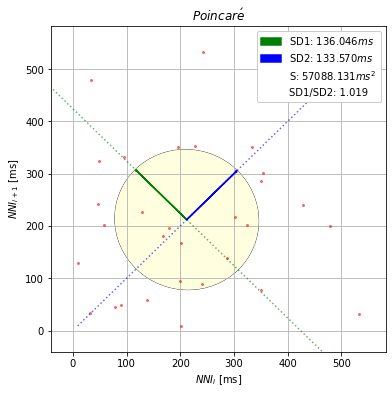

ReturnTuple(poincare_plot=<Figure size 432x432 with 1 Axes>, sd1=136.04637485472045, sd2=133.57001701147024, sd_ratio=0.9817976932799963, ellipse_area=57088.13138528032)


In [64]:
from django.contrib.admin.utils import flatten
import pyhrv
import pyhrv.nonlinear as nl

# Estructuración de datos para Poincaré

min_c5 = [local_AR_df[0].dropna().tolist()]
min_c5 = flatten(min_c5)

# min_vk5 = [l.tolist() for l in tabulado_vk5['mins']]
# min_vk5 = flatten(min_vk5)

# min_dan5 = [l.tolist() for l in tabulado_dan5['mins']]
# min_dan5 = flatten(min_dan5)

# Load sample data
nni = min_c5

# Compute Poincaré using NNI series
results = nl.poincare(nni)

# Print SD1
print(results)

# results[0].savefig("c5.png")

In [65]:
print(local_AR_df.mean())
print(local_AR_df.std())

0    0.212720
1    0.224773
2    0.204553
3    0.205035
4    0.188297
dtype: float64
0    0.137779
1    0.153079
2    0.128664
3    0.129717
4    0.108881
dtype: float64


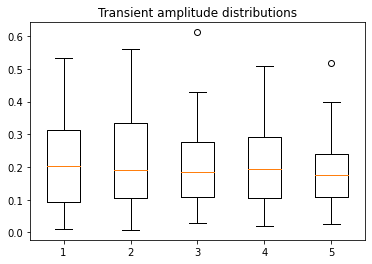

In [68]:
import matplotlib.pyplot as plt

data = np.array(local_AR_df.dropna())
fig7, ax7 = plt.subplots()
ax7.set_title('Transient amplitude distributions')
ax7.boxplot(data)

plt.show()